# Chain Non-$n$-Locality Robustness to Single-Qubit Noise

This notebook plots data pertaining to a single noisy link in a chain network.

In [12]:
from context import QNetOptimizer as QNopt

import matplotlib.pyplot as plt
from pennylane import numpy as np
import json

from os import listdir
from os.path import isfile, join
import re

## Helper Function for Aggregating Data

In [13]:
def analyze_data_files(data_files):
    data_dicts = []
    for filepath in data_files:
        with open(filepath) as file:
            data_dicts.append(json.load(file))
    
    results = {}
    noise_params = []
    for data_dict in data_dicts:
        for i in range(len(data_dict["noise_params"])):
            if np.isnan(data_dict["max_scores"][i]):
                continue
            
            noise_key = "{:.2f}".format(data_dict["noise_params"][i])
            
            if noise_key in results:
                results[noise_key].append(data_dict["max_scores"][i])
            else:
                results[noise_key] = [data_dict["max_scores"][i]]
                noise_params.append(np.round(data_dict["noise_params"][i],5))
    
    sorted_noise_params = np.sort(noise_params)
    max_scores = [
        max(results["{:.2f}".format(noise_param)])
        for noise_param in sorted_noise_params
    ]
    mean_scores = [
        np.mean(results["{:.2f}".format(noise_param)], axis=0)
        for noise_param in sorted_noise_params
    ]
    std_errs = [
        np.std(results[noise_key], axis=0) / np.sqrt(len(results[noise_key]))
        for noise_key in ["{:.2f}".format(noise_param) for noise_param in sorted_noise_params]
    ]
    
    
    return sorted_noise_params, max_scores, mean_scores, std_errs     

## Loading Data

### Loading Files for Depolarizing Noise $q_0$

In [14]:
dep_path = "../../script/data/chain_n-local_1-qubit_depolarizing/outside/"
dep_path_files = listdir(dep_path)

local_rot_n2_dep_files = [
    join(dep_path, f) for f in dep_path_files if (
        f.endswith(".json") and isfile(join(dep_path, f)) and bool(re.match(r".*local_rot_n-2.*", f))
    )
]
print("num local_rot_n-2 files : ", len(local_rot_n2_dep_files))

(
    local_rot_n2_noise_params_dep,
    local_rot_n2_max_scores_dep,
    local_rot_n2_mean_scores_dep,
    local_rot_n2_std_errs_dep
) = analyze_data_files(local_rot_n2_dep_files)

local_rot_n3_dep_files = [
    join(dep_path, f) for f in dep_path_files if (
        f.endswith(".json") and isfile(join(dep_path, f)) and bool(re.match(r".*local_rot_n-3.*", f))
    )
]
print("num local_rot_n-3 files : ", len(local_rot_n3_dep_files))

(
    local_rot_n3_noise_params_dep,
    local_rot_n3_max_scores_dep,
    local_rot_n3_mean_scores_dep,
    local_rot_n3_std_errs_dep
) = analyze_data_files(local_rot_n3_dep_files)

bell_n2_dep_files = [
    join(dep_path, f) for f in dep_path_files if (
        f.endswith(".json") and isfile(join(dep_path, f)) and bool(re.match(r".*bell_n-2.*", f))
    )
]
print("num bell_n-2 files : ", len(bell_n2_dep_files))

(
    bell_n2_noise_params_dep,
    bell_n2_max_scores_dep,
    bell_n2_mean_scores_dep,
    bell_n2_std_errs_dep
) = analyze_data_files(bell_n2_dep_files)

bell_n3_dep_files = [
    join(dep_path, f) for f in dep_path_files if (
        f.endswith(".json") and isfile(join(dep_path, f)) and bool(re.match(r".*bell_n-3.*", f))
    )
]
print("num bell_n-3 files : ", len(bell_n3_dep_files))

(
    bell_n3_noise_params_dep,
    bell_n3_max_scores_dep,
    bell_n3_mean_scores_dep,
    bell_n3_std_errs_dep
) = analyze_data_files(bell_n3_dep_files)

arb_n2_dep_files = [
    join(dep_path, f) for f in dep_path_files if (
        f.endswith(".json") and isfile(join(dep_path, f)) and bool(re.match(r".*arb_n-2.*", f))
    )
]
print("num arb_n-2 files : ", len(arb_n2_dep_files))

(
    arb_n2_noise_params_dep,
    arb_n2_max_scores_dep,
    arb_n2_mean_scores_dep,
    arb_n2_std_errs_dep
) = analyze_data_files(arb_n2_dep_files)

arb_n3_dep_files = [
    join(dep_path, f) for f in dep_path_files if (
        f.endswith(".json") and isfile(join(dep_path, f)) and bool(re.match(r".*arb_n-3.*", f))
    )
]
print("num arb_n-3 files : ", len(arb_n3_dep_files))

(
    arb_n3_noise_params_dep,
    arb_n3_max_scores_dep,
    arb_n3_mean_scores_dep,
    arb_n3_std_errs_dep
) = analyze_data_files(arb_n3_dep_files)

num local_rot_n-2 files :  9
num local_rot_n-3 files :  7
num bell_n-2 files :  3
num bell_n-3 files :  3
num arb_n-2 files :  7
num arb_n-3 files :  6


### Loading Files for Depolarizing Noise $q_1$

In [97]:
in_dep_path = "../../script/data/chain_n-local_1-qubit_depolarizing/inside/"
in_dep_path_files = listdir(in_dep_path)

local_rot_n2_dep_files = [
    join(in_dep_path, f) for f in in_dep_path_files if (
        f.endswith(".json") and isfile(join(in_dep_path, f)) and bool(re.match(r".*local_rot_n-2.*", f))
    )
]
print("num local_rot_n-2 files : ", len(local_rot_n2_dep_files))

(
    local_rot_n2_noise_params_dep_in,
    local_rot_n2_max_scores_dep_in,
    local_rot_n2_mean_scores_dep_in,
    local_rot_n2_std_errs_dep_in
) = analyze_data_files(local_rot_n2_dep_files)

local_rot_n3_dep_files = [
    join(in_dep_path, f) for f in in_dep_path_files if (
        f.endswith(".json") and isfile(join(in_dep_path, f)) and bool(re.match(r".*local_rot_n-3.*", f))
    )
]
print("num local_rot_n-3 files : ", len(local_rot_n3_dep_files))

(
    local_rot_n3_noise_params_dep_in,
    local_rot_n3_max_scores_dep_in,
    local_rot_n3_mean_scores_dep_in,
    local_rot_n3_std_errs_dep_in
) = analyze_data_files(local_rot_n3_dep_files)

bell_n2_dep_files = [
    join(in_dep_path, f) for f in in_dep_path_files if (
        f.endswith(".json") and isfile(join(in_dep_path, f)) and bool(re.match(r".*bell_n-2.*", f))
    )
]
print("num bell_n-2 files : ", len(bell_n2_dep_files))

(
    bell_n2_noise_params_dep_in,
    bell_n2_max_scores_dep_in,
    bell_n2_mean_scores_dep_in,
    bell_n2_std_errs_dep_in
) = analyze_data_files(bell_n2_dep_files)

bell_n3_dep_files = [
    join(in_dep_path, f) for f in in_dep_path_files if (
        f.endswith(".json") and isfile(join(in_dep_path, f)) and bool(re.match(r".*bell_n-3.*", f))
    )
]
print("num bell_n-3 files : ", len(bell_n3_dep_files))

(
    bell_n3_noise_params_dep_in,
    bell_n3_max_scores_dep_in,
    bell_n3_mean_scores_dep_in,
    bell_n3_std_errs_dep_in
) = analyze_data_files(bell_n3_dep_files)


arb_n2_dep_files = [
    join(in_dep_path, f) for f in in_dep_path_files if (
        f.endswith(".json") and isfile(join(in_dep_path, f)) and bool(re.match(r".*arb_n-2.*", f))
    )
]
print("num arb_n-2 files : ", len(arb_n2_dep_files))

(
    arb_n2_noise_params_dep_in,
    arb_n2_max_scores_dep_in,
    arb_n2_mean_scores_dep_in,
    arb_n2_std_errs_dep_in
) = analyze_data_files(arb_n2_dep_files)

arb_n3_dep_files = [
    join(in_dep_path, f) for f in in_dep_path_files if (
        f.endswith(".json") and isfile(join(in_dep_path, f)) and bool(re.match(r".*arb_n-3.*", f))
    )
]
print("num arb_n-3 files : ", len(arb_n3_dep_files))

(
    arb_n3_noise_params_dep_in,
    arb_n3_max_scores_dep_in,
    arb_n3_mean_scores_dep_in,
    arb_n3_std_errs_dep_in
) = analyze_data_files(arb_n3_dep_files)

num local_rot_n-2 files :  1
num local_rot_n-3 files :  1
num bell_n-2 files :  1
num bell_n-3 files :  1
num arb_n-2 files :  1
num arb_n-3 files :  1


### Loading Files for Amplitude Dammping Noise $q_0$

In [114]:
outside_amp_damp_path = "../../script/data/chain_n-local_1-qubit_amplitude_damping/outside/"
amp_damp_path_files = listdir(outside_amp_damp_path)

local_rot_n2_amp_damp_files = [
    join(outside_amp_damp_path, f) for f in amp_damp_path_files if (
        f.endswith(".json") and isfile(join(outside_amp_damp_path, f)) and bool(re.match(r".*local_rot_n-2.*", f))
    )
]
print("num local_rot_n-2 files : ", len(local_rot_n2_amp_damp_files))

(
    local_rot_n2_noise_params_amp_damp,
    local_rot_n2_max_scores_amp_damp,
    local_rot_n2_mean_scores_amp_damp,
    local_rot_n2_std_errs_amp_damp
) = analyze_data_files(local_rot_n2_amp_damp_files)

local_rot_n3_amp_damp_files = [
    join(outside_amp_damp_path, f) for f in amp_damp_path_files if (
        f.endswith(".json") and isfile(join(outside_amp_damp_path, f)) and bool(re.match(r".*local_rot_n-3.*", f))
    )
]
print("num local_rot_n-3 files : ", len(local_rot_n3_amp_damp_files))

(
    local_rot_n3_noise_params_amp_damp,
    local_rot_n3_max_scores_amp_damp,
    local_rot_n3_mean_scores_amp_damp,
    local_rot_n3_std_errs_amp_damp
) = analyze_data_files(local_rot_n3_amp_damp_files)

bell_n2_amp_damp_files = [
    join(outside_amp_damp_path, f) for f in amp_damp_path_files if (
        f.endswith(".json") and isfile(join(outside_amp_damp_path, f)) and bool(re.match(r".*bell_n-2.*", f))
    )
]
print("num bell_n-2 files : ", len(bell_n2_amp_damp_files))

(
    bell_n2_noise_params_amp_damp,
    bell_n2_max_scores_amp_damp,
    bell_n2_mean_scores_amp_damp,
    bell_n2_std_errs_amp_damp
) = analyze_data_files(bell_n2_amp_damp_files)

bell_n3_amp_damp_files = [
    join(outside_amp_damp_path, f) for f in amp_damp_path_files if (
        f.endswith(".json") and isfile(join(outside_amp_damp_path, f)) and bool(re.match(r".*bell_n-3.*", f))
    )
]
print("num bell_n-3 files : ", len(bell_n3_amp_damp_files))

(
    bell_n3_noise_params_amp_damp,
    bell_n3_max_scores_amp_damp,
    bell_n3_mean_scores_amp_damp,
    bell_n3_std_errs_amp_damp
) = analyze_data_files(bell_n3_amp_damp_files)


arb_n2_amp_damp_files = [
    join(outside_amp_damp_path, f) for f in amp_damp_path_files if (
        f.endswith(".json") and isfile(join(outside_amp_damp_path, f)) and bool(re.match(r".*arb_n-2.*", f))
    )
]
print("num arb_n-2 files : ", len(arb_n2_amp_damp_files))

(
    arb_n2_noise_params_amp_damp,
    arb_n2_max_scores_amp_damp,
    arb_n2_mean_scores_amp_damp,
    arb_n2_std_errs_amp_damp
) = analyze_data_files(arb_n2_amp_damp_files)

arb_n3_amp_damp_files = [
    join(outside_amp_damp_path, f) for f in amp_damp_path_files if (
        f.endswith(".json") and isfile(join(outside_amp_damp_path, f)) and bool(re.match(r".*arb_n-3.*", f))
    )
]
print("num arb_n-3 files : ", len(arb_n3_amp_damp_files))

(
    arb_n3_noise_params_amp_damp,
    arb_n3_max_scores_amp_damp,
    arb_n3_mean_scores_amp_damp,
    arb_n3_std_errs_amp_damp
) = analyze_data_files(arb_n3_amp_damp_files)

num local_rot_n-2 files :  10
num local_rot_n-3 files :  8
num bell_n-2 files :  9
num bell_n-3 files :  9
num arb_n-2 files :  10
num arb_n-3 files :  7


### Loading Files for Amplitude Dammping Noise $q_1$

In [115]:
inside_amp_damp_path = "../../script/data/chain_n-local_1-qubit_amplitude_damping/inside/"
amp_damp_path_files = listdir(inside_amp_damp_path)

local_rot_n2_amp_damp_files = [
    join(inside_amp_damp_path, f) for f in amp_damp_path_files if (
        f.endswith(".json") and isfile(join(inside_amp_damp_path, f)) and bool(re.match(r".*local_rot_n-2.*", f))
    )
]
print("num local_rot_n-2 files : ", len(local_rot_n2_amp_damp_files))

(
    local_rot_n2_noise_params_amp_damp_in,
    local_rot_n2_max_scores_amp_damp_in,
    local_rot_n2_mean_scores_amp_damp_in,
    local_rot_n2_std_errs_amp_damp_in
) = analyze_data_files(local_rot_n2_amp_damp_files)

local_rot_n3_amp_damp_files = [
    join(inside_amp_damp_path, f) for f in amp_damp_path_files if (
        f.endswith(".json") and isfile(join(inside_amp_damp_path, f)) and bool(re.match(r".*local_rot_n-3.*", f))
    )
]
print("num local_rot_n-3 files : ", len(local_rot_n3_amp_damp_files))

(
    local_rot_n3_noise_params_amp_damp_in,
    local_rot_n3_max_scores_amp_damp_in,
    local_rot_n3_mean_scores_amp_damp_in,
    local_rot_n3_std_errs_amp_damp_in
) = analyze_data_files(local_rot_n3_amp_damp_files)

bell_n2_amp_damp_files = [
    join(inside_amp_damp_path, f) for f in amp_damp_path_files if (
        f.endswith(".json") and isfile(join(inside_amp_damp_path, f)) and bool(re.match(r".*bell_n-2.*", f))
    )
]
print("num bell_n-2 files : ", len(bell_n2_amp_damp_files))

(
    bell_n2_noise_params_amp_damp_in,
    bell_n2_max_scores_amp_damp_in,
    bell_n2_mean_scores_amp_damp_in,
    bell_n2_std_errs_amp_damp_in
) = analyze_data_files(bell_n2_amp_damp_files)

bell_n3_amp_damp_files = [
    join(inside_amp_damp_path, f) for f in amp_damp_path_files if (
        f.endswith(".json") and isfile(join(inside_amp_damp_path, f)) and bool(re.match(r".*bell_n-3.*", f))
    )
]
print("num bell_n-3 files : ", len(bell_n3_amp_damp_files))

(
    bell_n3_noise_params_amp_damp_in,
    bell_n3_max_scores_amp_damp_in,
    bell_n3_mean_scores_amp_damp_in,
    bell_n3_std_errs_amp_damp_in
) = analyze_data_files(bell_n3_amp_damp_files)


arb_n2_amp_damp_files = [
    join(inside_amp_damp_path, f) for f in amp_damp_path_files if (
        f.endswith(".json") and isfile(join(inside_amp_damp_path, f)) and bool(re.match(r".*arb_n-2.*", f))
    )
]
print("num arb_n-2 files : ", len(arb_n2_amp_damp_files))

(
    arb_n2_noise_params_amp_damp_in,
    arb_n2_max_scores_amp_damp_in,
    arb_n2_mean_scores_amp_damp_in,
    arb_n2_std_errs_amp_damp_in
) = analyze_data_files(arb_n2_amp_damp_files)

arb_n3_amp_damp_files = [
    join(inside_amp_damp_path, f) for f in amp_damp_path_files if (
        f.endswith(".json") and isfile(join(inside_amp_damp_path, f)) and bool(re.match(r".*arb_n-3.*", f))
    )
]
print("num arb_n-3 files : ", len(arb_n3_amp_damp_files))

(
    arb_n3_noise_params_amp_damp_in,
    arb_n3_max_scores_amp_damp_in,
    arb_n3_mean_scores_amp_damp_in,
    arb_n3_std_errs_amp_damp_in
) = analyze_data_files(arb_n3_amp_damp_files)

num local_rot_n-2 files :  3
num local_rot_n-3 files :  3
num bell_n-2 files :  3
num bell_n-3 files :  3
num arb_n-2 files :  3
num arb_n-3 files :  3


### Plots for Bilocal Case

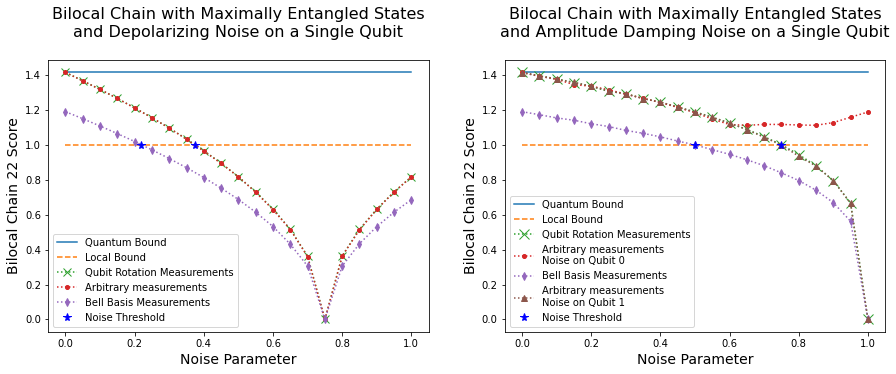

In [116]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.plot(local_rot_n2_noise_params_dep, [2/np.sqrt(2)]*len(local_rot_n2_noise_params_dep), label="Quantum Bound")
ax1.plot(local_rot_n2_noise_params_dep, [1]*len(local_rot_n2_noise_params_dep), "--", label="Local Bound")

ax1.plot(local_rot_n2_noise_params_dep, local_rot_n2_max_scores_dep, ":x", markersize=8, label="Qubit Rotation Measurements")
ax1.plot(arb_n2_noise_params_dep, arb_n2_max_scores_dep, ":.", markersize=8, label="Arbitrary measurements")
ax1.plot(bell_n2_noise_params_dep, bell_n2_max_scores_dep, ":d", markersize=5, label="Bell Basis Measurements")

ax1.plot([(1-1/np.sqrt(2))*3/4, (1-1/2)*3/4], [1,1], "b*", markersize=8, label="Noise Threshold")

ax1.set_title("Bilocal Chain with Maximally Entangled States\nand Depolarizing Noise on a Single Qubit\n", size=16)
ax1.set_ylabel("Bilocal Chain 22 Score", size=14)
ax1.set_xlabel("Noise Parameter", size=14)
ax1.legend()

ax2.plot(local_rot_n2_noise_params_amp_damp, [2/np.sqrt(2)]*len(local_rot_n2_noise_params_amp_damp), label="Quantum Bound")
ax2.plot(local_rot_n2_noise_params_amp_damp, [1]*len(local_rot_n2_noise_params_amp_damp), "--", label="Local Bound")

ax2.plot(local_rot_n2_noise_params_amp_damp, local_rot_n2_max_scores_amp_damp, ":x", markersize=10, label="Qubit Rotation Measurements")

ax2.plot(arb_n2_noise_params_amp_damp, arb_n2_max_scores_amp_damp, ":.", markersize=8, label="Arbitrary measurements\nNoise on Qubit 0")

ax2.plot(bell_n2_noise_params_amp_damp, bell_n2_max_scores_amp_damp, ":d", markersize=5, label="Bell Basis Measurements")
ax2.plot(arb_n2_noise_params_amp_damp_in, arb_n2_max_scores_amp_damp_in, ":^", markersize=6, label="Arbitrary measurements\nNoise on Qubit 1")


ax2.plot([0.5,0.75], [1,1], "b*", markersize=8, label="Noise Threshold")

ax2.set_title("Bilocal Chain with Maximally Entangled States\nand Amplitude Damping Noise on a Single Qubit\n", size=16)
ax2.set_ylabel("Bilocal Chain 22 Score", size=14)
ax2.set_xlabel("Noise Parameter", size=14)
ax2.legend()

plt.show()

### Plots for Trilocal Case

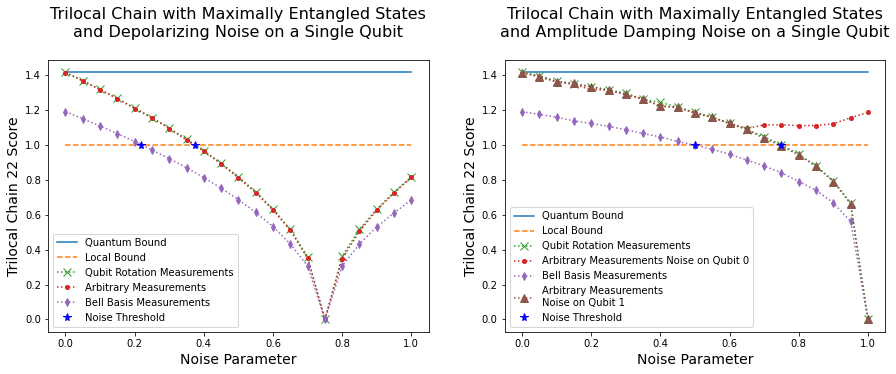

In [117]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.plot(local_rot_n3_noise_params_dep, [2/np.sqrt(2)]*len(local_rot_n3_noise_params_dep), label="Quantum Bound")
ax1.plot(local_rot_n3_noise_params_dep, [1]*len(local_rot_n3_noise_params_dep), "--", label="Local Bound")

ax1.plot(local_rot_n3_noise_params_dep, local_rot_n3_max_scores_dep, ":x", markersize=8, label="Qubit Rotation Measurements")
ax1.plot(arb_n3_noise_params_dep, arb_n3_max_scores_dep, ":.", markersize=8, label="Arbitrary Measurements")
ax1.plot(bell_n3_noise_params_dep, bell_n3_max_scores_dep, ":d", markersize=5, label="Bell Basis Measurements")

ax1.plot([(1-1/np.sqrt(2))*3/4,(1-1/2)*3/4], [1,1], "b*", markersize=8, label="Noise Threshold")

ax1.set_title("Trilocal Chain with Maximally Entangled States\nand Depolarizing Noise on a Single Qubit\n", size=16)
ax1.set_ylabel("Trilocal Chain 22 Score", size=14)
ax1.set_xlabel("Noise Parameter", size=14)
ax1.legend()

ax2.plot(local_rot_n3_noise_params_amp_damp, [2/np.sqrt(2)]*len(local_rot_n3_noise_params_amp_damp), label="Quantum Bound")
ax2.plot(local_rot_n3_noise_params_amp_damp, [1]*len(local_rot_n3_noise_params_amp_damp), "--", label="Local Bound")

ax2.plot(local_rot_n3_noise_params_amp_damp, local_rot_n3_max_scores_amp_damp, ":x", markersize=8, label="Qubit Rotation Measurements")

ax2.plot(arb_n3_noise_params_amp_damp, arb_n3_max_scores_amp_damp, ":.", markersize=8, label=r"Arbitrary Measurements Noise on Qubit 0")
ax2.plot(bell_n3_noise_params_amp_damp, bell_n3_max_scores_amp_damp, ":d", markersize=5, label="Bell Basis Measurements")

ax2.plot(arb_n3_noise_params_amp_damp_in, arb_n3_max_scores_amp_damp_in, ":^", markersize=8, label="Arbitrary Measurements\nNoise on Qubit 1")


ax2.plot([0.5,0.75], [1,1], "b*", markersize=8, label="Noise Threshold")


ax2.set_title("Trilocal Chain with Maximally Entangled States\nand Amplitude Damping Noise on a Single Qubit\n", size=16)
ax2.set_ylabel("Trilocal Chain 22 Score", size=14)
ax2.set_xlabel("Noise Parameter", size=14)
ax2.legend()

plt.show()

## Verifying Similarities Between Inside and Outside Channel Application

We find that inside versus outside application of the channel does not matter unless one considers the amplitude damping channel with arbitrary measurements.

In [109]:
len([filter(
    lambda x: x == False,
    [np.isclose(local_rot_n2_max_scores_dep[i], local_rot_n2_max_scores_dep_in[i], atol=0.01) for i in range(21)]
)])



1

In [110]:
[np.isclose(local_rot_n3_max_scores_dep[i], local_rot_n3_max_scores_dep_in[i], atol=0.01) for i in range(21)]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True]

In [72]:
[np.isclose(arb_n2_max_scores_dep[i], arb_n2_max_scores_dep_in[i], atol=0.01) for i in range(21)]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [87]:
[np.isclose(arb_n3_max_scores_dep[i], arb_n3_max_scores_dep_in[i], atol=0.01) for i in range(21)]

[False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True]

In [76]:
[np.isclose(bell_n2_max_scores_dep[i], bell_n2_max_scores_dep_in[i], atol=0.01) for i in range(21)]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [73]:
[np.isclose(bell_n3_max_scores_dep[i], bell_n3_max_scores_dep_in[i], atol=0.01) for i in range(21)]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [113]:
# [np.isclose(local_rot_n2_max_scores_amp_damp[i], local_rot_n2_max_scores_amp_damp_in[i], atol=0.01) for i in range(21)]
# [np.isclose(local_rot_n3_max_scores_amp_damp[i], local_rot_n3_max_scores_amp_damp_in[i], atol=0.01) for i in range(21)]
# [np.isclose(bell_n2_max_scores_amp_damp[i], bell_n2_max_scores_amp_damp_in[i], atol=0.01) for i in range(21)]
# [np.isclose(bell_n3_max_scores_amp_damp[i], bell_n3_max_scores_amp_damp_in[i], atol=0.01) for i in range(21)]
# [np.isclose(arb_n2_max_scores_amp_damp[i], arb_n2_max_scores_amp_damp_in[i], atol=0.05) for i in range(21)]
# [np.isclose(arb_n3_max_scores_amp_damp[i], arb_n3_max_scores_amp_damp_in[i], atol=0.01) for i in range(21)]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]